<a href="https://colab.research.google.com/github/jeffblackadar/image_work/blob/master/photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
obverse_type = "Elizabeth II young" #@param ["Elizabeth II young", "Elizabeth II Machin", "George VI", "Abraham Lincoln"]


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photon.jpg', quality=10):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to George VI 2019-08-10 15:54:14.056113.jpg
/content


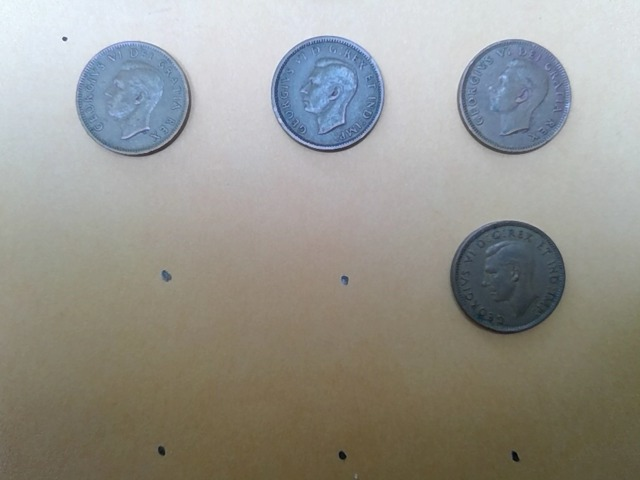

In [0]:
from IPython.display import Image
import datetime
#obverse_type = "Elizabeth II young"
obverse_type = "George VI" 
# "Elizabeth II young", "Elizabeth II Machin", "George VI", "Abraham Lincoln"
try:
  filename = take_photo(filename= obverse_type +" "+str(datetime.datetime.now())+'.jpg')
  print('Saved to {}'.format(filename))
  import os
  print( os.getcwd() )
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [61]:
# importing required modules 
from zipfile import ZipFile 
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = '.'
  
    # calling function to get all file paths in the directory 
    obverse_type = "Elizabeth II young"
    file_paths = [filename for filename in os.listdir('.') if filename.startswith(obverse_type)]
    #file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    print('Following files will be zipped:') 
    for file_name in file_paths: 
        print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile("zip"+obverse_type+'.zip','w') as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  
if __name__ == "__main__": 
    main() 

Following files will be zipped:
Elizabeth II young 2019-08-10 15:43:22.508192.jpg
Elizabeth II young 2019-08-10 15:42:31.365222.jpg
Elizabeth II young 2019-08-10 15:41:20.591925.jpg
Elizabeth II young 2019-08-10 15:42:19.385554.jpg
Elizabeth II young 2019-08-10 15:41:52.188758.jpg
Elizabeth II young 2019-08-10 15:41:40.961865.jpg
Elizabeth II young 2019-08-10 15:43:51.650337.jpg
Elizabeth II young 2019-08-10 15:42:05.243354.jpg
Elizabeth II young 2019-08-10 15:42:49.321509.jpg
All files zipped successfully!


In [0]:
os.mkdir('photos')